In [1]:
import dist_maps
from sklearn import datasets
from sklearn import linear_model
from sklearn import manifold
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

from boundarymap import CLF
from boundarymap import Grid
import json

n_samples = 100
COLORS = ["#377eb8", "#ff7f00", '#4daf4a']

/home/fcmr/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train acc:  1.0
test acc:  1.0


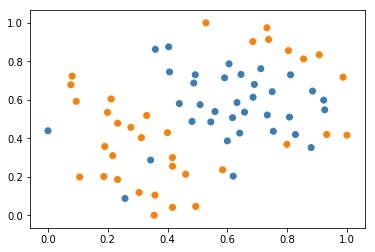

In [2]:
# generate dataset
X, y = datasets.make_classification(n_samples=n_samples, n_classes=2,
                                    n_features=16, n_redundant=0,
                                    n_informative=10, random_state=1,
                                    n_clusters_per_class=1)

num_train = int(X.shape[0]*0.7)
X_train = X[:num_train]
y_train = y[:num_train]

X_test = X[num_train:]
y_test = y[num_train:]

# FIXME: normalize train data, apply normalization to test data
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf_lr = linear_model.LogisticRegression()
clf_lr.fit(X_train, y_train)
print("train acc: ", clf_lr.score(X_train, y_train))
print("test acc: ", clf_lr.score(X_test, y_test))

tsne = manifold.TSNE(perplexity=10)
X_proj = tsne.fit_transform(X_train)
proj_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_proj = proj_scaler.fit_transform(X_proj)

colors = [COLORS[v] for v in y_train]
plt.scatter(X_proj[:, 0], X_proj[:, 1], color=colors)

clf = CLF(clf=clf_lr, clf_type="sklearn")
basedir = '/tmp/syn_test/'

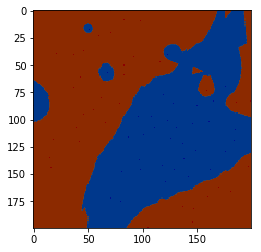

In [3]:
R = 200
N = [5]
grid1 = Grid(X_proj, R)
_, dmap = grid1.BoundaryMap(X_train, N[0], clf)

plt.imshow(hsv_to_rgb(dmap))

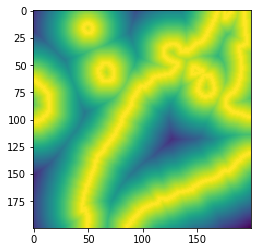

In [4]:
dist_2d = dist_maps.dist2d(dmap)
dist_2d /= dist_2d.max()
dist_2d = 1.0 - dist_2d
plt.imshow(dist_2d)

computing boundary cells
	time:  4.454064846038818
computing distance transform
	time:  0.0024709701538085938
refining boundaries
	time:  6.037692308425903
computing nd distances
	time:  45.2867693901062


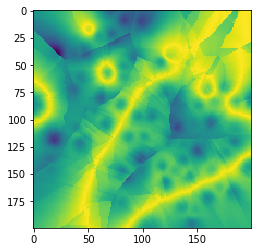

In [5]:
dist_nd = dist_maps.distnd(dmap, X_train, X_proj, clf=clf_lr)
dist_nd /= dist_nd.max()
dist_nd = 1.0 - dist_nd
plt.imshow(dist_nd)

generating ilamp samples
	time:  11.528374433517456
constructing kdtree
	time:  0.02769184112548828
computing distances between nd samples
	time:  0.0700521469116211


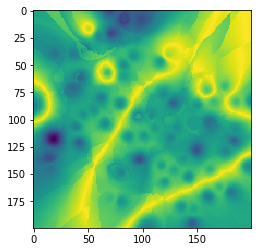

In [6]:
GRID_SIZE = dmap.shape[0]
dist_nd_2 = dist_maps.distnd2(X_train, X_proj, clf_lr, GRID_SIZE)
dist_nd_2 /= dist_nd_2.max()
dist_nd_2 = 1.0 - dist_nd_2
plt.imshow(dist_nd_2)

/home/fcmr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


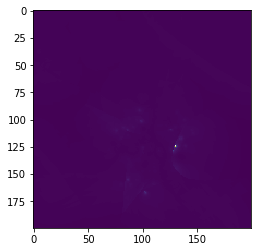

In [18]:
ratio = (dist_2d + dist_2d.min())/(dist_nd + dist_nd.min())
plt.imshow(ratio)

/home/fcmr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


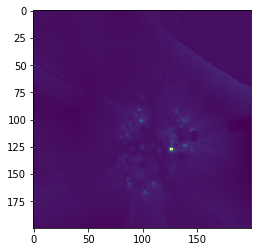

In [17]:
ratio = (dist_2d + dist_2d.min())/(dist_nd_2 + dist_nd_2.min())
plt.imshow(ratio)

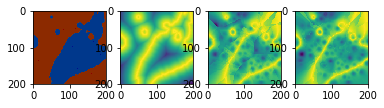

In [8]:
plt.subplot(141)
plt.imshow(hsv_to_rgb(dmap))
plt.subplot(142)
plt.imshow(dist_2d)
plt.subplot(143)
plt.imshow(dist_nd)
plt.subplot(144)
plt.imshow(dist_nd_2)
plt.show()

/home/fcmr/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fcmr/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


train acc:  0.8952380952380953
test acc:  0.8666666666666667


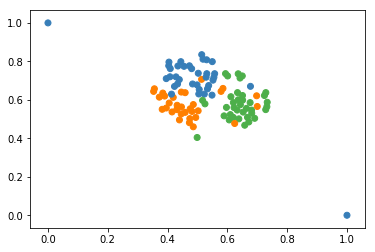

In [9]:
n_samples = 150
# generate a new dataset with 3 classes
X, y = datasets.make_classification(n_samples=n_samples, n_classes=3,
                                    n_features=16, n_redundant=0,
                                    n_informative=16, random_state=1,
                                    n_clusters_per_class=1)

num_train = int(X.shape[0]*0.7)
X_train = X[:num_train]
y_train = y[:num_train]

X_test = X[num_train:]
y_test = y[num_train:]

# FIXME: normalize train data, apply normalization to test data
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf_lr = linear_model.LogisticRegression()
clf_lr.fit(X_train, y_train)
print("train acc: ", clf_lr.score(X_train, y_train))
print("test acc: ", clf_lr.score(X_test, y_test))

tsne = manifold.TSNE(perplexity=10)
X_proj = tsne.fit_transform(X_train)
proj_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_proj = proj_scaler.fit_transform(X_proj)

colors = [COLORS[v] for v in y_train]
plt.scatter(X_proj[:, 0], X_proj[:, 1], color=colors)

clf = CLF(clf=clf_lr, clf_type="sklearn")

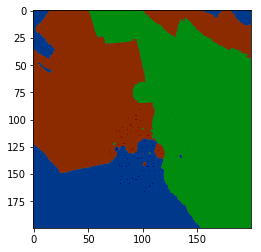

In [10]:
R = 200
N = [5]
grid1 = Grid(X_proj, R)
_, dmap = grid1.BoundaryMap(X_train, N[0], clf)

plt.imshow(hsv_to_rgb(dmap))

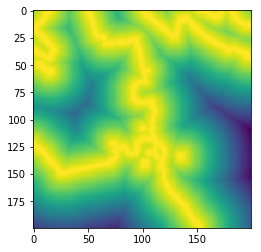

In [11]:
dist_2d = dist_maps.dist2d(dmap)
dist_2d /= dist_2d.max()
dist_2d = 1.0 - dist_2d
plt.imshow(dist_2d)

computing boundary cells
	time:  4.701396942138672
computing distance transform
	time:  0.0026695728302001953
refining boundaries
	time:  7.220097303390503
computing nd distances
	time:  54.96820878982544


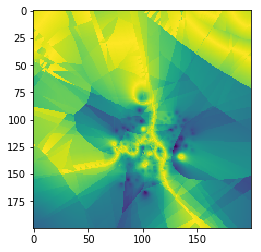

In [12]:
dist_nd = dist_maps.distnd(dmap, X_train, X_proj, clf=clf_lr)
dist_nd /= dist_nd.max()
dist_nd = 1.0 - dist_nd
plt.imshow(dist_nd)

generating ilamp samples
	time:  14.018189191818237
constructing kdtree
	time:  0.039194583892822266
computing distances between nd samples
	time:  0.18401122093200684


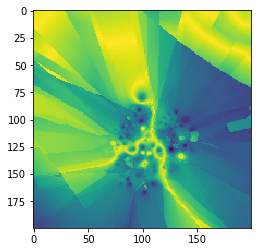

In [13]:
GRID_SIZE = dmap.shape[0]
dist_nd_2 = dist_maps.distnd2(X_train, X_proj, clf_lr, GRID_SIZE)
dist_nd_2 /= dist_nd_2.max()
dist_nd_2 = 1.0 - dist_nd_2
plt.imshow(dist_nd_2)

In [ ]:
np.save(basedir + 'X_train.npy', X_train)
np.save(basedir + 'y_train.npy', y_train)
np.save(basedir + 'y_pred.npy', y_train)
np.save(basedir + 'X_proj.npy', X_proj)
np.save(basedir + 'dmap_syn.npy', dmap)

dist_2d_path = basedir + "dist_nd.npy"
dist_nd_path = basedir + "dist_nd.npy"
dist_nd_2_path = basedir + "dist_nd_2.npy"
np.save(dist_nd_path, dist_nd)
np.save(dist_nd_2_path, dist_nd_2)

json_data = {}
json_data['X'] = basedir + 'X_train.npy'
json_data['y'] = basedir + 'y_train.npy'
json_data['y_pred'] = basedir + 'y_pred.npy'
json_data['proj'] = basedir + 'X_proj.npy'
json_data['dense_map'] = basedir + 'dmap_syn.npy'
json_data['dist_map'] = basedir + 'dist_nd_2.npy'

with open(basedir + 'data.json', 'w') as fp:
    json.dump(json_data, fp)
